In [ ]:
import urllib.request
import os
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import re

Importing
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded
VHI is downloaded


In [ ]:
def data_downloader(path):
    print("Importing")
    for i in range(1, 28):
        url = f"https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php?country=UKR&provinceID={i}&year1=1981&year2=2024&type=Mean"
        vhi_url = urllib.request.urlopen(url)
        file_path = os.path.join(path, f'vhi_id_{i}.csv')
        with open(file_path, 'wb') as out:
            out.write(vhi_url.read())
        print(f"VHI is downloaded")

data_downloader("D:\engineering\lab2")

In [ ]:
arr = []
headers = ['year', 'week', 'SMN', 'SMT', 'VCI', 'TCI', 'VHI', 'provinceID']

provinces = ["Вінницька область", "Волинська область", "Дніпропетровська область", "Донецька область", "Житомирська область", "Закарпатська область", "Запорізька область", "Івано-Франківська область", "Київська область", "Кіровоградська область", "Луганська область", "Львівська область", "Миколаївська область", "Одеська область", "Полтавська область", "Рівенська область", "Сумська область", "Тернопільська область", "Харківська область", "Херсонська область", "Хмельницька область", "Черкаська область", "Чернівецька область", "Чернігівська область", "Республіка Крим", "м. Київ", "м. Севастополь"]
provinceID = [22,24,23,25,3,4,8,19,20,21,9,26,10,11,12,13,14,15,16,27,17,18,6,1,2,7,5]

for i in range(1,28):
    df = pd.read_csv(f'vhi_id_{i}.csv', index_col=False, header=1, names=headers)
    df['provinceID'] = provinceID[i-1]

    df["year"] = df["year"].apply(lambda x: re.sub('<[^<]+?>', '', x))
    df.rename(columns= {"VHI<br>": "VHI"})

    
    df = df.drop(df.loc[df['VHI'] == -1].index)
    df = df.iloc[:-1 , :]
    df = df.astype({"year": "int64", "week": "int64"})
    arr.append(df)
    
concatDf = pd.concat(arr)
concatDf = concatDf.sort_values(["provinceID", "year", "week"])
display(concatDf)

,year,week,SMN,SMT,VCI,TCI,VHI,provinceID
0,1982,1,0.068,263.59,63.47,28.34,45.90,1
1,1982,2,0.074,265.78,67.62,23.05,45.34,1
2,1982,3,0.076,267.19,69.37,20.40,44.88,1
3,1982,4,0.075,268.57,65.26,17.93,41.60,1
4,1982,5,0.072,269.24,58.58,20.00,39.29,1
...,...,...,...,...,...,...,...,...
2231,2024,48,0.211,280.75,88.40,11.77,50.08,27
2232,2024,49,0.199,280.07,89.19,9.69,49.44,27
2233,2024,50,0.188,279.76,91.98,5.74,48.86,27
2234,2024,51,0.181,279.52,94.34,3.45,48.89,27


In [69]:
def VHI_analysis(df):
    weekNum = df.shape[0]
    df_good = df[(df["VHI"] > 60)].shape[0] / weekNum
    df_medium = df[(df["VHI"] <= 60) & (df["VHI"] > 40)].shape[0] / weekNum
    df_stress = df[(df["VHI"] <= 40) & (df["VHI"] > 15)].shape[0] / weekNum
    df_drought = df[(df["VHI"] <= 15)].shape[0] / weekNum
    print(f"    Відсоток тижнів з сприятливими умовами: {round(df_good, 3)}")
    print(f"    Відсоток тижнів з достатніми умовами: {round(df_medium, 3)}")
    print(f"    Відсоток тижнів з стресовими умовами: {round(df_stress, 3)}")
    print(f"    Відсоток тижнів з посухою: {round(df_drought, 3)}")
    print(40 * "~")

Для 2020 року:
    Відсоток тижнів з сприятливими умовами: 0.058
    Відсоток тижнів з достатніми умовами: 0.615
    Відсоток тижнів з стресовими умовами: 0.327
    Відсоток тижнів з посухою: 0.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Для 1999 року:
    Відсоток тижнів з сприятливими умовами: 0.212
    Відсоток тижнів з достатніми умовами: 0.462
    Відсоток тижнів з стресовими умовами: 0.327
    Відсоток тижнів з посухою: 0.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


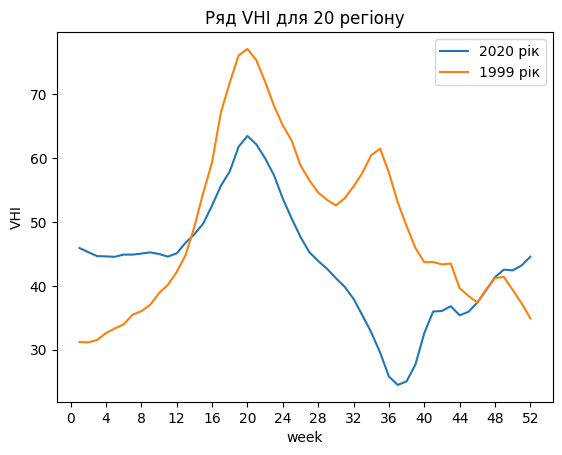

In [70]:
def yearly_VHI(df = concatDf): 
    years = input("Введіть рік(-и) для виведення інформації: ")
    years = list(map(int, years.split()))
    index = int(input("Введіть індекс регіону (1-27): "))
    for i in range(len(years)):
        yearlyDf = df[(df["provinceID"] == index) & (df["year"] == years[i])]
        sns.lineplot(data = yearlyDf, x="week", y="VHI", label=f"{years[i]} рік")
        plt.title(f"Ряд VHI для {index} регіону")
        print(f"Для {years[i]} року:")
        VHI_analysis(yearlyDf)
    plt.xticks(np.arange(0, 53, 4))

yearly_VHI()

In [74]:
def important_data(df = concatDf):
    years = input("Введіть рік(-и) для виведення інформації: ")
    years = list(map(int, years.split()))
    indexes = input("Введіть індекс(-и) регіону(-ів) (1-27): ")
    indexes = list(map(int, indexes.split()))

    for i in range(len(indexes)):
        print(f"Для {indexes[i]} регіону:")
        for j in range(len(years)):
            yearlyDf = df[(df["provinceID"] == indexes[i]) & (df["year"] == years[j])]["VHI"]
            min_v = yearlyDf.min()
            max_v = yearlyDf.max()
            avg_v = yearlyDf.mean()
            median_v = yearlyDf.median()
            print(f"    За {years[j]} рік:")
            print(f"{2 * '    '}Максимальне значення VHI: {max_v}")
            print(f"{2 * '    '}Мінімальне значення VHI: {min_v}")
            print(f"{2 * '    '}Середнє значення VHI: {round(avg_v, 3)}")
            print(f"{2 * '    '}Медіана VHI: {round(median_v, 3)}")
        print(40 * "~")

important_data()

Для 12 регіону:
    За 2020 рік:
        Максимальне значення VHI: 63.06
        Мінімальне значення VHI: 41.35
        Середнє значення VHI: 50.626
        Медіана VHI: 48.92
    За 2014 рік:
        Максимальне значення VHI: 67.6
        Мінімальне значення VHI: 41.46
        Середнє значення VHI: 51.225
        Медіана VHI: 50.18
    За 1999 рік:
        Максимальне значення VHI: 66.08
        Мінімальне значення VHI: 36.37
        Середнє значення VHI: 50.987
        Медіана VHI: 51.015
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Для 25 регіону:
    За 2020 рік:
        Максимальне значення VHI: 39.47
        Мінімальне значення VHI: 18.79
        Середнє значення VHI: 33.053
        Медіана VHI: 34.185
    За 2014 рік:
        Максимальне значення VHI: 56.51
        Мінімальне значення VHI: 28.95
        Середнє значення VHI: 43.272
        Медіана VHI: 43.195
    За 1999 рік:
        Максимальне значення VHI: 75.78
        Мінімальне значення VHI: 29.94
        Середнє значення VHI:

22 Черкаська - 1
24 Чернігівська - 2
23 Чернівецька - 3
25 Республіка Крим - 4
3 Дніпропетровська  - 5
4 Донецька      - 6
8 Івано-Франківська - 7
19 Харківська - 8
20 Херсонська - 9
21 Хмельницька - 10
9 Київська - 11
26 м. Київ - 12
10 Кіровоградська - 13
11 Луганська -14
12 Львівська - 15
13 Миколаївська - 16
14 Одеська - 17
15 Полтавська - 18
16 Рівенська - 19
27 Севастополь - 20
17 Сумська - 21
18 Тернопільська - 22
6 Закарпатська - 23
1 Вінницька         - 24
2 Волинська - 25
7 Запорізька - 26
5 Житомирська - 27







